### Import approperiate libraries and settings

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set(
    font_scale=1.5,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
)

In [2]:
df = pd.read_csv('train.csv', low_memory=False )
print('Shape of df is: ', df.shape)
df.head(3)

Shape of df is:  (1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [4]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [5]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=1017209, step=1)

In [7]:
store = pd.read_csv('store.csv')

In [8]:
store.head(2)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


In [9]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [10]:
store['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [11]:
df_new = df.merge(store,on=["Store"], how="inner")

In [12]:
len(df_new['Store'].unique())

1115

In [13]:
df_new['DayOfWeek'].value_counts()

5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: DayOfWeek, dtype: int64

In [14]:
# Date feature

df_new['Date'] = pd.to_datetime(df['Date'], infer_datetime_format = True)
df_new['Month']=df_new['Date'].dt.month
df_new['Quarter']=df_new['Date'].dt.quarter
df_new['Year']=df_new['Date'].dt.year
df_new['Day']=df_new['Date'].dt.day
df_new['Week']=df_new['Date'].dt.week

df_new["Season"] = np.where(df_new["Month"].isin([3,4,5]),"Spring",
np.where(df_new["Month"].isin([6,7,8]),
"Summer",
np.where(df_new["Month"].isin
([9,10,11]),"Fall",
np.where(df_new["Month"].isin
([12,1,2]),"Winter","None"))))

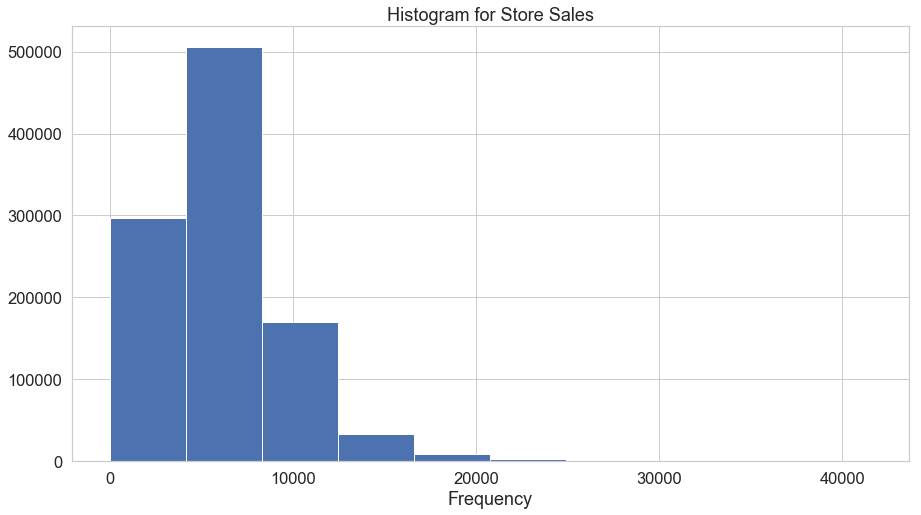

In [15]:
#Import matplotlib, python most popular data visualizing library
import matplotlib.pyplot as plt
%matplotlib inline

#Create a histogram to study the Daily Sales for the stores
plt.figure(figsize=(15,8))
plt.hist(df_new["Sales"])
plt.title("Histogram for Store Sales")
plt.xlabel("bins")
plt.xlabel("Frequency")
plt.show()

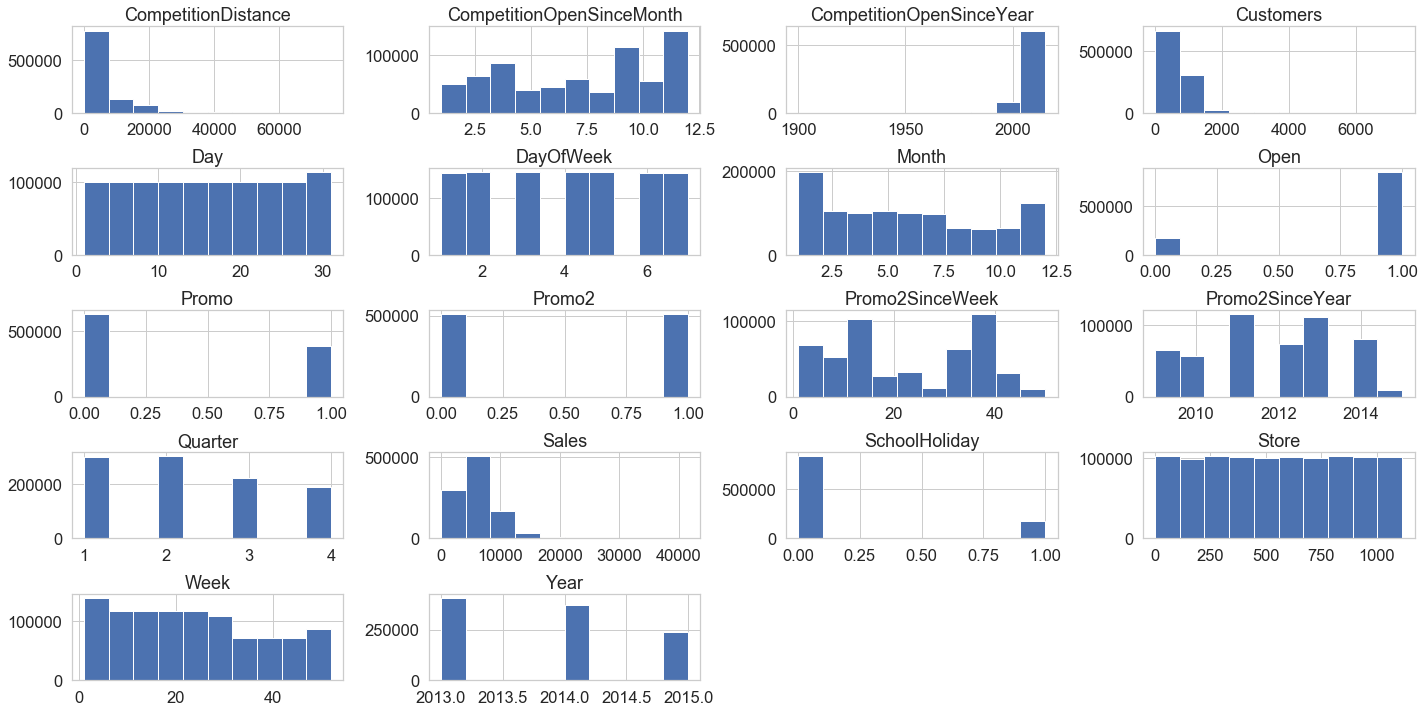

In [16]:
#Use the histogram function provided by the Pandas object
#The function returns a cross-tab histogram plot for all numeric columns in the data
df_new.hist(figsize=(20,10))
plt.tight_layout()
plt.show()



In [17]:
print((df_new.isnull().sum()/df_new.shape[0])*100)

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
Month                         0.000000
Quarter                       0.000000
Year                          0.000000
Day                           0.000000
Week                          0.000000
Season                        0.000000
dtype: float64


In [18]:
df_new_missing = df_new[['Store' ,'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']]

for i in range(1, len(df_new_missing['Store'].unique())):
    print('The percentage of the missing values in the store',i,'is: ')
    print((df_new_missing[df_new_missing['Store']==i].isnull().sum()/df_new_missing[df_new_missing['Store']==i].shape[0])*100)
    
    

The percentage of the missing values in the store 1 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 2 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 3 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval           

dtype: float64
The percentage of the missing values in the store 26 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 27 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 28 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoI

dtype: float64
The percentage of the missing values in the store 51 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 52 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 53 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInt

dtype: float64
The percentage of the missing values in the store 76 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 77 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 78 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoI

dtype: float64
The percentage of the missing values in the store 108 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 109 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 110 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2Si

dtype: float64
The percentage of the missing values in the store 133 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 134 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 135 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear         

dtype: float64
The percentage of the missing values in the store 170 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 171 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 172 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear         

dtype: float64
The percentage of the missing values in the store 206 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear                0.0
PromoInterval                  0.0
dtype: float64
The percentage of the missing values in the store 207 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 208 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2Si

dtype: float64
The percentage of the missing values in the store 234 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 235 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 236 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear         

dtype: float64
The percentage of the missing values in the store 258 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 259 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 260 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear         

dtype: float64
The percentage of the missing values in the store 282 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 283 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear                0.0
PromoInterval                  0.0
dtype: float64
The percentage of the missing values in the store 284 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2Si

dtype: float64
The percentage of the missing values in the store 316 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 317 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 318 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear         

dtype: float64
The percentage of the missing values in the store 340 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 341 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 342 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2Si

dtype: float64
The percentage of the missing values in the store 374 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 375 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 376 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear         

Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 408 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear                0.0
PromoInterval                  0.0
dtype: float64
The percentage of the missing values in the store 409 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear                0.0
PromoInterval                  0.0
dtype: float64
The percentag

dtype: float64
The percentage of the missing values in the store 441 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 442 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear                0.0
PromoInterval                  0.0
dtype: float64
The percentage of the missing values in the store 443 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2Si

dtype: float64
The percentage of the missing values in the store 465 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 466 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 467 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2Si

dtype: float64
The percentage of the missing values in the store 501 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 502 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 503 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
Pro

dtype: float64
The percentage of the missing values in the store 526 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear                0.0
PromoInterval                  0.0
dtype: float64
The percentage of the missing values in the store 527 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 528 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2Si

dtype: float64
The percentage of the missing values in the store 550 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 551 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 552 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear     

dtype: float64
The percentage of the missing values in the store 584 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear                0.0
PromoInterval                  0.0
dtype: float64
The percentage of the missing values in the store 585 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 586 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2Si

dtype: float64
The percentage of the missing values in the store 609 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 610 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 611 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear     

dtype: float64
The percentage of the missing values in the store 633 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 634 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 635 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear         

The percentage of the missing values in the store 668 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 669 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 670 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear                0.0
Prom

dtype: float64
The percentage of the missing values in the store 698 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 699 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear                0.0
PromoInterval                  0.0
dtype: float64
The percentage of the missing values in the store 700 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2Si

dtype: float64
The percentage of the missing values in the store 724 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 725 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 726 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2Si

The percentage of the missing values in the store 748 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 749 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 750 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
d

dtype: float64
The percentage of the missing values in the store 772 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 773 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 774 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2Si

dtype: float64
The percentage of the missing values in the store 798 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 799 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 800 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2Si

Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 825 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 826 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentag

dtype: float64
The percentage of the missing values in the store 850 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 851 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear                0.0
PromoInterval                  0.0
dtype: float64
The percentage of the missing values in the store 852 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
Pro

dtype: float64
The percentage of the missing values in the store 875 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 876 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 877 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
Promo

dtype: float64
The percentage of the missing values in the store 900 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 901 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 902 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
Pro

dtype: float64
The percentage of the missing values in the store 925 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 926 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 927 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
Promo

dtype: float64
The percentage of the missing values in the store 951 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear                0.0
PromoInterval                  0.0
dtype: float64
The percentage of the missing values in the store 952 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 953 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear     

dtype: float64
The percentage of the missing values in the store 976 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 977 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 978 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear         

Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear                0.0
PromoInterval                  0.0
dtype: float64
The percentage of the missing values in the store 1002 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 1003 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percent

dtype: float64
The percentage of the missing values in the store 1028 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear                0.0
PromoInterval                  0.0
dtype: float64
The percentage of the missing values in the store 1029 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 1030 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo

dtype: float64
The percentage of the missing values in the store 1054 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear                0.0
PromoInterval                  0.0
dtype: float64
The percentage of the missing values in the store 1055 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 1056 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo

dtype: float64
The percentage of the missing values in the store 1079 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear                0.0
PromoInterval                  0.0
dtype: float64
The percentage of the missing values in the store 1080 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear                0.0
PromoInterval                  0.0
dtype: float64
The percentage of the missing values in the store 1081 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo

The percentage of the missing values in the store 1104 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 1105 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 1106 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.

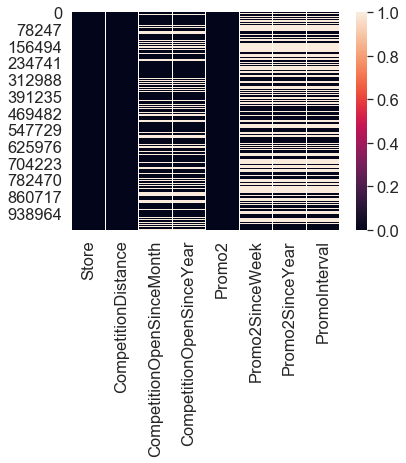

In [19]:
import seaborn as sns

sns.heatmap(df_new_missing.isnull())
plt.show()

In [19]:
#Replace nulls with the mode
df_new["CompetitionDistance"]=df_new["CompetitionDistance"].fillna(df_new["CompetitionDistance"].mode()[0])
#Double check if we still see nulls for the column
df_new["CompetitionDistance"].isnull().sum()/df_new.shape[0] * 100

0.0

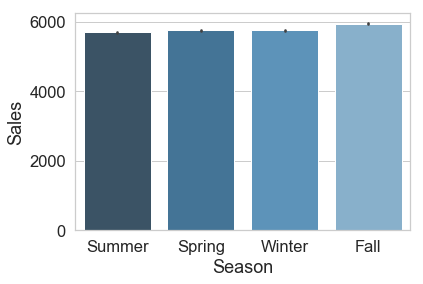

In [20]:
#Create the bar plot for Average Sales across different Seasons
ax = sns.barplot(x="Season", y="Sales", data=df_new,  palette="Blues_d")

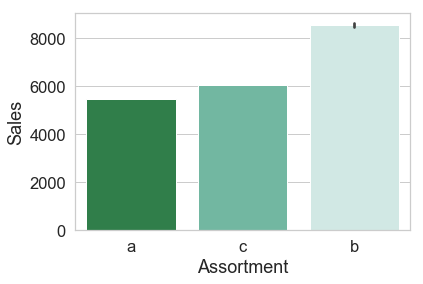

In [21]:
#Create the bar plot for Average Sales across different Assortments
ax = sns.barplot(x="Assortment", y="Sales", data=df_new,  palette="BuGn_r")

In [ ]:
#Create the bar plot for Average Sales across different Store Types
ax = sns.barplot(x="StoreType", y="Sales", data=df_new, palette="Blues_d")

In [ ]:
ax = sns.barplot(x="Season", y="Sales", data=df_new,
estimator=np.size, palette="GnBu_d")

In [ ]:
ax = sns.barplot(x="Assortment", y="Sales", data=df_new,
estimator=np.size, palette="Blues_d")

In [ ]:
ax = sns.barplot(x="StoreType", y="Sales", data=df_new,
estimator=np.size, palette="Blues_d")

In [27]:
#Define a variable for each type of feature
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
target = ["Sales"]
numeric_columns = ["Customers","Open","Promo","Promo2",
"StateHoliday","SchoolHoliday","CompetitionDistance"]
categorical_columns = ["DayOfWeek","Quarter","Month","Year",
"StoreType","Assortment","Season"]

In [28]:
#Define a function that will intake the raw dataframe and the column name and return a one hot encoded DF
def create_ohe(df, col):
    le = LabelEncoder()
    a=le.fit_transform(df_new[col]).reshape(-1,1)
    ohe = OneHotEncoder(sparse=False)
    column_names = [col+ "_"+ str(i) for i in le.classes_]
    
    return(pd.DataFrame(ohe.fit_transform(a),columns =column_names))

In [29]:
#Since the above function converts the column, one at a time
#We create a loop to create the final dataset with all features
temp = df_new[numeric_columns]

for column in categorical_columns:
    temp_df = create_ohe(df_new,column)
    temp = pd.concat([temp,temp_df],axis=1)

In [30]:
print("Shape of Data:",temp.shape)
print("Distinct Datatypes:",temp.dtypes.unique())

Shape of Data: (1017209, 44)
Distinct Datatypes: [dtype('int64') dtype('O') dtype('float64')]


In [31]:
temp["StateHoliday"]= np.where(temp["StateHoliday"]== '0',0,1)
#One last check of the data type
temp.dtypes.unique()

array([dtype('int64'), dtype('int32'), dtype('float64')], dtype=object)

In [32]:
from sklearn.model_selection import train_test_split
#Create train and test dataset with an 80:20 split
x_train, x_test, y_train, y_test = train_test_split(temp,
df_new[target],test_size=0.2,random_state=2018)
#Further divide training dataset into train and validation dataset with an 90:10 split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.1,random_state=2018)

In [33]:
#Check the sizes of all newly created datasets
print("Shape of x_train:",x_train.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_val:",y_val.shape)
print("Shape of y_test:",y_test.shape)

Shape of x_train: (732390, 44)
Shape of x_val: (81377, 44)
Shape of x_test: (203442, 44)
Shape of y_train: (732390, 1)
Shape of y_val: (81377, 1)
Shape of y_test: (203442, 1)


In [34]:
#calculate the average score of the train dataset
mean_sales = y_train.mean()
print("Average Sales :",mean_sales)

Average Sales : Sales    5773.099997
dtype: float64


In [35]:
#Calculate the Mean Absolute Error on the test dataset
print("MAE for Test Data:",abs(y_test - mean_sales).mean()[0])

MAE for Test Data: 2883.587604303215


In [36]:
# Create neural network
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(150, input_dim=44, activation = 'relu'))
model.add(Dense(1, activation='linear'))

#Config the model
model.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['mean_absolute_error'])

#train model
model.fit(x_train.values,y_train.values, validation_data=
(x_val,y_val),epochs=10,batch_size=64)

Using TensorFlow backend.


Train on 732390 samples, validate on 81377 samples
Epoch 1/10
732390/732390 [==============================] - 34s 47us/step - loss: 948.1628 - mean_absolute_error: 948.1637 - val_loss: 835.0369 - val_mean_absolute_error: 835.0370
Epoch 2/10
732390/732390 [==============================] - 37s 50us/step - loss: 791.9101 - mean_absolute_error: 791.9103 - val_loss: 754.2362 - val_mean_absolute_error: 754.2365
Epoch 3/10
732390/732390 [==============================] - 33s 45us/step - loss: 750.4336 - mean_absolute_error: 750.4349 - val_loss: 742.2960 - val_mean_absolute_error: 742.2960
Epoch 4/10
732390/732390 [==============================] - 32s 44us/step - loss: 734.0721 - mean_absolute_error: 734.0743 - val_loss: 723.1142 - val_mean_absolute_error: 723.1154
Epoch 5/10
732390/732390 [==============================] - 34s 46us/step - loss: 722.5113 - mean_absolute_error: 722.5114 - val_loss: 721.4653 - val_mean_absolute_error: 721.4648
Epoch 6/10
732390/732390 [=======================

In [38]:
#Use the model's evaluate method to predict and evaluate the test datasets
result = model.evaluate(x_test.values,y_test.values)
#Print the results
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result
    [i],2)))


203442/203442 [==============================] - 7s 33us/step
Metric  loss : 699.64
Metric  mean_absolute_error : 699.64


### Improving the model

In [40]:
model = Sequential()
model.add(Dense(150, input_dim = 44, activation = 'relu'))
model.add(Dense(150, activation = 'relu'))
model.add(Dense(150, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [41]:
model.compile(optimizer = 'adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

history = model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=10,batch_size=64)

result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Train on 732390 samples, validate on 81377 samples
Epoch 1/10
732390/732390 [==============================] - 54s 74us/step - loss: 1733944.6244 - mean_absolute_error: 857.3345 - val_loss: 1356551.8931 - val_mean_absolute_error: 812.6385
Epoch 2/10
732390/732390 [==============================] - 50s 68us/step - loss: 1177917.8269 - mean_absolute_error: 732.9675 - val_loss: 1031418.8416 - val_mean_absolute_error: 689.8808
Epoch 3/10
732390/732390 [==============================] - 48s 66us/step - loss: 1088930.9012 - mean_absolute_error: 704.9576 - val_loss: 1052102.7434 - val_mean_absolute_error: 706.0944
Epoch 4/10
732390/732390 [==============================] - 50s 68us/step - loss: 1024457.9003 - mean_absolute_error: 683.8555 - val_loss: 963571.5504 - val_mean_absolute_error: 664.2906
Epoch 5/10
732390/732390 [==============================] - 51s 70us/step - loss: 974840.0129 - mean_absolute_error: 665.2380 - val_loss: 1081547.8164 - val_mean_absolute_error: 705.3688
Epoch 6/10


### ِDeeper

In [44]:
model = Sequential()
model.add(Dense(150, input_dim = 44, activation = 'relu'))
model.add(Dense(150, activation = 'relu'))
model.add(Dense(150, activation = 'relu'))
model.add(Dense(150, activation = 'relu'))
model.add(Dense(150, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [45]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])
model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=15,batch_size=64)

result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result
    [i],2)))

Train on 732390 samples, validate on 81377 samples
Epoch 1/15
732390/732390 [==============================] - 70s 96us/step - loss: 1732628.8046 - mean_absolute_error: 860.5645 - val_loss: 1247248.9992 - val_mean_absolute_error: 760.6575
Epoch 2/15
732390/732390 [==============================] - 69s 94us/step - loss: 1167721.4817 - mean_absolute_error: 727.0822 - val_loss: 1027989.5150 - val_mean_absolute_error: 689.7168
Epoch 3/15
732390/732390 [==============================] - 70s 96us/step - loss: 1078960.6831 - mean_absolute_error: 698.6807 - val_loss: 1013892.6132 - val_mean_absolute_error: 677.9429
Epoch 4/15
732390/732390 [==============================] - 70s 95us/step - loss: 1019207.9471 - mean_absolute_error: 679.2617 - val_loss: 948261.5343 - val_mean_absolute_error: 668.0812
Epoch 5/15
732390/732390 [==============================] - 75s 103us/step - loss: 969129.8570 - mean_absolute_error: 661.2010 - val_loss: 878984.3784 - val_mean_absolute_error: 635.5566
Epoch 6/15


### and deeper ..

In [46]:
from keras.callbacks import History
history = History()

model = Sequential()
model.add(Dense(350,input_dim = 44,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(1,activation = "linear"))

model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])
              
model.fit(x_train,y_train, validation_data=(x_val,y_val),
epochs=15,batch_size=64,callbacks=[history])
result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result
    [i],2)))

Train on 732390 samples, validate on 81377 samples
Epoch 1/15
732390/732390 [==============================] - 81s 110us/step - loss: 1633209.9994 - mean_absolute_error: 844.3065 - val_loss: 1400060.8674 - val_mean_absolute_error: 822.6415
Epoch 2/15
732390/732390 [==============================] - 75s 102us/step - loss: 1180868.5659 - mean_absolute_error: 730.7925 - val_loss: 1042145.4379 - val_mean_absolute_error: 690.7180
Epoch 3/15
732390/732390 [==============================] - 75s 103us/step - loss: 1099054.1200 - mean_absolute_error: 703.9016 - val_loss: 978068.7457 - val_mean_absolute_error: 668.0012
Epoch 4/15
732390/732390 [==============================] - 75s 103us/step - loss: 1030454.7747 - mean_absolute_error: 682.2480 - val_loss: 994580.9191 - val_mean_absolute_error: 666.7988
Epoch 5/15
732390/732390 [==============================] - 75s 103us/step - loss: 974949.0403 - mean_absolute_error: 662.0288 - val_loss: 957144.5763 - val_mean_absolute_error: 651.6049
Epoch 6/

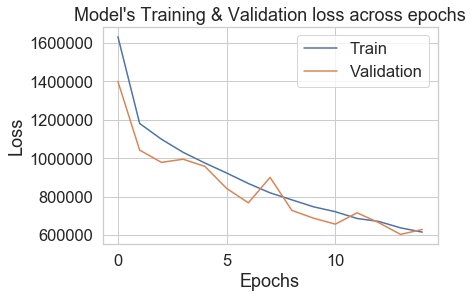

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [50]:
#Manually predicting from the model, instead of using model's evaluate function
y_test["Prediction"] = model.predict(x_test)
y_test.columns = ["Actual Sales","Predicted Sales"]
print(y_test.head(10))

#Manually predicting from the model, instead of using model's evaluate function
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE :",mean_squared_error(y_test["Actual Sales"].
values,y_test["Predicted Sales"].values))
print("MAE :",mean_absolute_error(y_test["Actual Sales"].
values,y_test["Predicted Sales"].values))

        Actual Sales  Predicted Sales
115563             0         1.036706
832654             0         1.036706
769112          2933      2997.852051
350588          8602      7103.434570
141556          6975      6272.821777
84435           9239      9641.497070
53018              0         1.036706
262419             0         1.036706
702267          5885      5772.460449
981431             0         1.036706
MSE : 629187.4754699777
MAE : 521.6593970375192
